In [1]:
import numpy as np
import pickle 
import sys, os
sys.path.append("..")
from logger import Logger
import matplotlib.pyplot as plt

In [2]:
def get_logger(pth):
    with open(pth, 'rb') as f:
        logger = pickle.load(f)
    logger.train_loss = np.asarray(logger.train_loss)
    logger.train_conf = np.asarray(logger.train_conf)

    logger.valid_loss = np.asarray(logger.valid_loss)
    logger.valid_conf = np.asarray(logger.valid_conf)

    logger.test_loss = np.asarray(logger.test_loss)
    logger.test_conf = np.asarray(logger.test_conf)

    logger.elapsed_time = np.asarray(logger.elapsed_time)
    
    return logger

In [12]:
cva = '../cva_sine_result_files/updatefinder100k_10000_40_0_1.pkl'
cavia = '../sine_result_files/long10000__10_25.pkl'
maml = '../maml_sine_result_files/long10000__1_25.pkl'

loggers = {
    'cva': get_logger(cva),
    'cavia': get_logger(cavia),
    'maml': get_logger(maml)
}

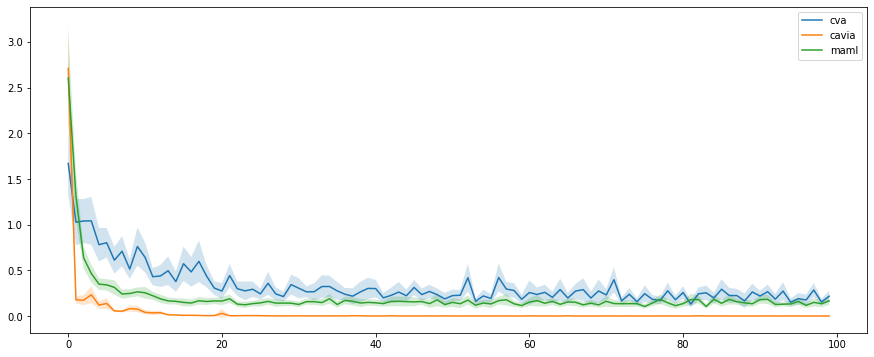

In [11]:
# plot the performance of everything
alpha = 0.2
for i, logger in loggers.items():
    x = [j for j in range(len(logger.test_loss))]
    
    plt.plot(x, logger.test_loss, label=i)
    plt.fill_between(x, logger.test_loss+logger.test_conf, logger.test_loss-logger.test_conf, alpha=alpha)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(15,6)
# plt.ylim(0,.5)
plt.show()

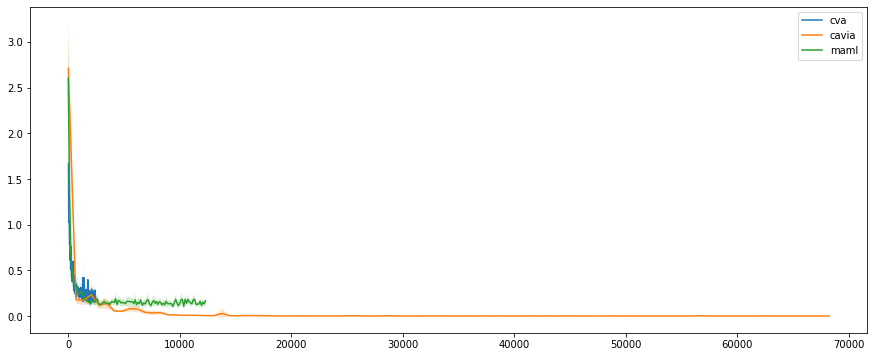

In [17]:
# performance vs time 
for i, logger in loggers.items():
    x = [j for j in range(len(logger.test_loss))]
    plt.plot(logger.elapsed_time, logger.test_loss, label=i)
    plt.fill_between(logger.elapsed_time, logger.test_loss+logger.test_conf, logger.test_loss-logger.test_conf, alpha=alpha)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(15,6)
# plt.xlim(0,2500)
plt.show()

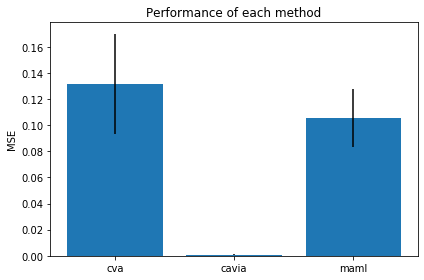

In [9]:
perf = []
perfsd = []
for i, logger in loggers.items():
    idx = np.argmin(loggers[i].test_loss)
    perf.append(loggers[i].test_loss[idx])
    perfsd.append(loggers[i].test_conf[idx])
perf = np.asarray(perf)
perfsd = np.asarray(perfsd)
    
x = np.arange(len(loggers.keys()))
plt.bar(x, perf, yerr=perfsd, align='center')
plt.xticks(x, loggers.keys())
plt.ylabel('MSE')
plt.title('Performance of each method')
plt.tight_layout()

plt.show()